In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
from sklearn.preprocessing import *
# from sklearn 
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# for error calculation MSE or MAE or Rsquare
from sklearn.metrics import *
# for spllititing the data_set
from sklearn.model_selection import train_test_split
# For support support vector regression
from sklearn.svm import SVR
# for time execution calculation
from datetime import datetime
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.preprocessing import OneHotEncoder, label_binarize

In [171]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
#At home windows
# spec = importlib.util.spec_from_file_location("DataPreprocessing", "C:/Users/PRAYAS/PycharmProjects/Machine_Learning_Python/Utility/DataPreprocessing.py")
# C:\Users\PRAYAS\PycharmProjects\Machine_Learning_Python\Utility
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()


Data PreProcessign object created successfully


In [172]:
dataframe = pd.read_csv('Data/bike_sharing.csv')

In [173]:
dataframe.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1425,1426,2011-03-04,1,0,3,16,0,5,1,1,0.36,0.3485,0.46,0.194,17,101,118


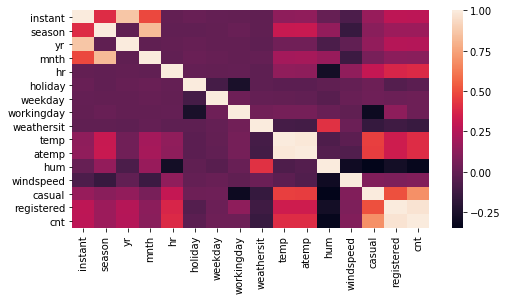

In [174]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(dataframe.corr())

In [175]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [176]:
dataframe['dteday'].nunique()

731

In [177]:
dataframe=dataframe.drop(['hum','dteday'],axis=1)

In [178]:
dataframe.isna().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

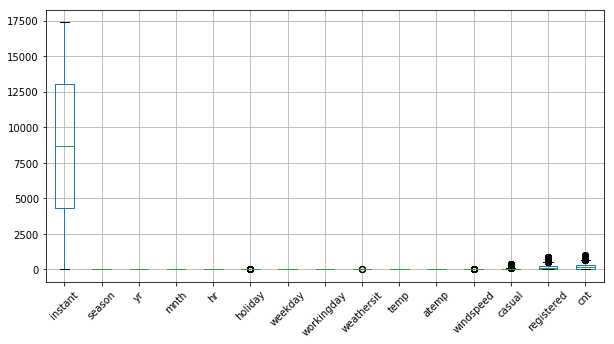

In [179]:
plt.figure(figsize=(10,5))
dataframe.boxplot(rot=45)

In [180]:
# trial without removing outliers

In [181]:
dataframe.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.0,0,1,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9355646710>,
      dtype=object)

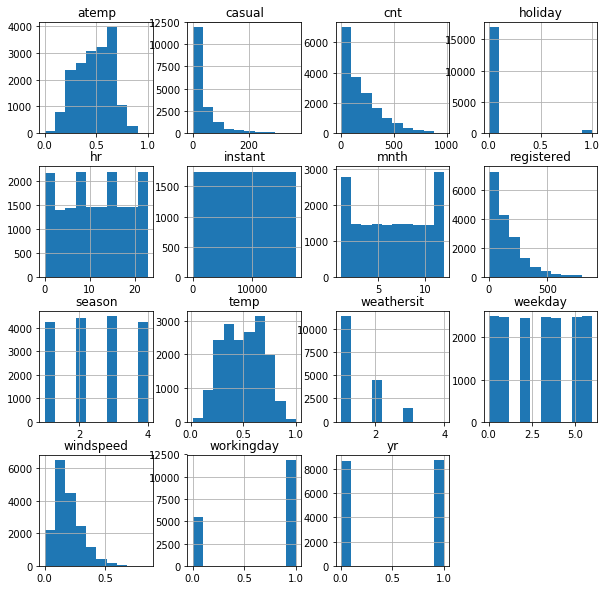

In [182]:

dataframe.hist(figsize=(10,10))

In [183]:
dataframe.nunique()

instant       17379
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [219]:
class Random_Forest_Regression:
    
    def __init__(self):
        self.trees = 300
        print("Random Forest Regression")
        
    def plotter(self,X,Y,reg,plot_title):
        # smoothening the plot so that we can see a smooth curve so getting points with difference 0.1
        X_smooth = np.arange(X.min(),X.max(),0.01)
        plt.title(plot_title)
        if reg != '':
            plt.plot(X_smooth,reg.predict(X_smooth.reshape(-1,1)),color='r')
        else:
#             Y_smooth = np.arange(Y.min(),Y.max(),0.01)
            plt.plot(X,Y,color='g')            
    
    def Random_Forest_Regression_demo(self,dataframe):
        # creating Linear regression object
        reg = RandomForestRegressor(n_estimators=self.trees,random_state=0)
        # creating decision regression object with random state =0 as if same function operated any where it'll give same resukt on the same set

        # Splitting independent variables and the output variables
        train_data = dataframe['x'].values
        train_Y = dataframe['y'].values
        # spilling train and test data
        train_data, test_data, train_Y, test_Y = train_test_split(train_data,train_Y, test_size=0.2,random_state=0)
        # geting the values of x till the degree provided
        
        reg.fit(train_data.reshape(-1,1),train_Y.reshape(-1,1))
        
        # predicting the values on basis of our input data
        Ypred = reg.predict(test_data.reshape(-1,1))
         
        print("The value for 6.5 is ", reg.predict(np.array(6.5).reshape(-1,1)))
        
         # error calculations
        mse = mean_squared_error(Ypred,test_Y)
        mae = mean_absolute_error(Ypred,test_Y)
        r_score = r2_score(Ypred,test_Y)
        accuracy = r_score*100
        print("Accuracy by r2 score is = {}".format(accuracy))
#         print("mae: {}, mse: {}, r2 score: {}".format(mae,mse,r_score))
        
        # plotting
        self.plotter(train_data,train_Y,reg,'train data vs predicted')
        self.plotter(test_data,test_Y,reg,'test data vs predicted')
    
    def learning_curve(self,algo,features,output,train_sizes,cv_val):
        train_sizes, train_scores,validation_scores = learning_curve(
            estimator=algo,
            X=features,
            y=output,
            train_sizes=train_sizes,
            cv=cv_val,
            scoring = 'neg_mean_squared_error'
        )
        print('Train scores: \n{}\n Validation scores: \n{}\n'.format(train_scores,validation_scores))
        train_mean= -np.mean(train_scores,axis=1)
        valid_mean= np.mean(validation_scores,axis=1)
#         print(train_mean,valid_mean)
        plt.plot(train_sizes,train_mean,label='training error curve',color='g')
        plt.legend()
        plt.show()
        plt.plot(train_sizes,valid_mean,label='validation error curve',color='r')
        plt.legend()
        plt.show()
    
    def main(self,dataframe):
        try:
            self.Random_Forest_Regression_demo(dataframe)
            self.learning_curve(RandomForestRegressor(),dataframe.drop('cnt',axis=1),dataframe['cnt'],)
        except Exception as e:
            print("Process stopped because ",e)

# if __name__ == '__main__':
#     obj = Random_Forest_Regression()
#     obj.main(dataframe)

In [220]:
obj = Random_Forest_Regression()
train_sizes = [1,50,100,200,500,2000,5000,7000,9000,12000,13000]

Random Forest Regression


In [221]:
samp = dataframe['weekday']

Train scores: 
[[ -0.          -0.          -0.          -0.          -0.        ]
 [-69.4328     -18.4042      -9.7878     -11.763      -12.151     ]
 [-86.8377      -8.8377      -8.0297      -8.2803     -11.9324    ]
 [-59.8131      -5.8402      -6.49005     -3.9206      -5.54485   ]
 [-18.4248      -1.81918     -2.42376     -1.84248     -1.73918   ]
 [ -7.078775    -2.34548     -3.033225    -1.707485    -2.58529   ]
 [ -3.781932    -2.557524    -2.234842    -2.348484    -2.113034  ]
 [ -4.07841286  -2.65781     -3.56119857  -2.11221286  -2.36325   ]
 [ -3.24624444  -3.06986556  -3.43830667  -1.95708556  -1.60314222]
 [ -2.9283775   -2.74103917  -2.75029583  -1.9912725   -2.42325167]
 [ -2.32090385  -2.25045231  -2.32356462  -2.07663077  -2.08881846]]
 Validation scores: 
[[-6.09284658e+04 -5.12481821e+04 -3.25623300e+04 -1.08023467e+05
  -1.02797324e+05]
 [-6.71839997e+02 -2.96845880e+04 -1.86523188e+04 -7.46866901e+04
  -7.15131198e+04]
 [-5.23936919e+02 -1.24901964e+04 -6.65615787

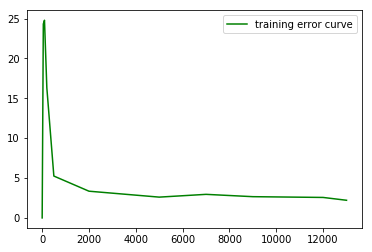

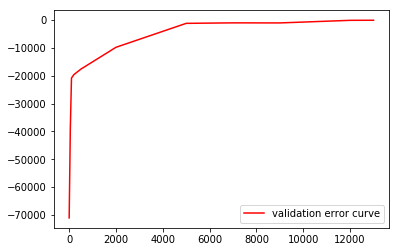

In [222]:
obj.learning_curve(RandomForestRegressor(),dataframe.drop('cnt',axis=1),dataframe['cnt'],train_sizes,5)

In [ ]:
# As we see the curve is converging it shows we have high bais and low variance